In [1]:
#importing libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
# Creating a SQL connection with our SQlite Database, i have an export of data from sqlite.
con = sqlite3.connect(r"zomato_rawdata.sqlite")

In [3]:
pd.read_sql_query("SELECT * FROM Users" , con).head(2)

,index,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari


In [4]:
Zomato_data = pd.read_sql_query("SELECT * FROM Users" , con)

In [5]:
Zomato_data.shape

(51717, 18)

In [6]:
Zomato_data.columns

Index(['index', 'url', 'address', 'name', 'online_order', 'book_table', 'rate',
       'votes', 'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [7]:
#Analyzing null values across columns
Zomato_data.isnull().sum()

index                              0
url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

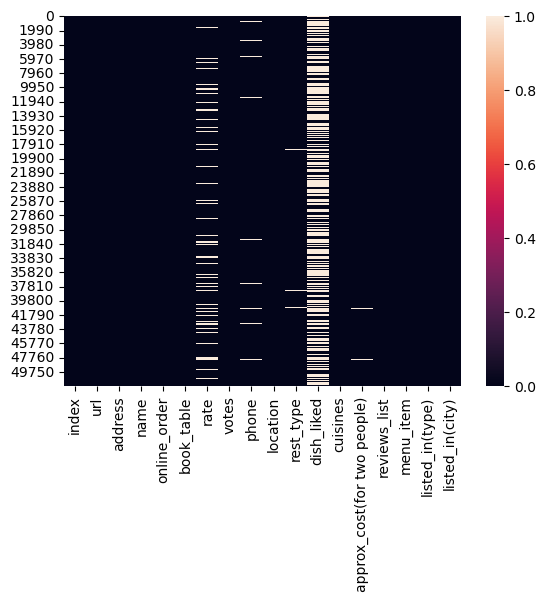

In [8]:
sns.heatmap(Zomato_data.isna())
plt.show()

Most of the missing values are either  
     - No Rating available  
     - Dish_liked column which is dishes people liked in the restaurant it is kind of a important columna and we do not want to lose data here  
     - Restuarant not Having phone number  
        
Its not good to drop missing value right now as we might loose important info , so 
we will deal with it depending upon the problem statements .
.


In [10]:
#looking at a few columns which have major missing values in order to make the data bit cleaner

In [11]:
Zomato_data.rate.unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', None, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

As all the ratings are out of 5 and there are few values such as 'NEW','NONE','-' and the backslash which is making the column as type OBJECT 

we will have to transform this column as int Datatype to perfrom statstical analysis

In [13]:
Zomato_data['rate'].replace(('NEW' , '-') , np.nan , inplace=True)

In [14]:
Zomato_data['rate'] = Zomato_data['rate'].apply(lambda x : float(x.split('/')[0]) if type(x)==str else x)

In [15]:
Zomato_data['rate']

0        4.1
1        4.1
2        3.8
3        3.7
4        3.8
        ... 
51712    3.6
51713    NaN
51714    NaN
51715    4.3
51716    3.4
Name: rate, Length: 51717, dtype: float64

In [16]:
Zomato_data['rate'].describe()

count    41665.000000
mean         3.700449
std          0.440513
min          1.800000
25%          3.400000
50%          3.700000
75%          4.000000
max          4.900000
Name: rate, dtype: float64

In [17]:
Zomato_data['rate'].isnull().sum()

10052

## Is there a relation between online order option and rating of the restaurant ?

In [19]:
### lets find out relation b/w rating & online_order
### ie how many restaurants that have rating 0 , 1 , 1.2 , 1.4 , 1.6--- & that accepts online_order & do not accept order
### for such problem statement , we will create frequency tables..

In [20]:
x = pd.crosstab(Zomato_data['rate'] , Zomato_data['online_order'],normalize='index')
x

online_order,No,Yes
rate,,
1.8,1.000000,0.000000
2.0,1.000000,0.000000
2.1,0.375000,0.625000
2.2,0.384615,0.615385
2.3,0.568627,0.431373
2.4,0.514286,0.485714
2.5,0.376238,0.623762
2.6,0.319231,0.680769
2.7,0.459283,0.540717


<Axes: xlabel='rate'>

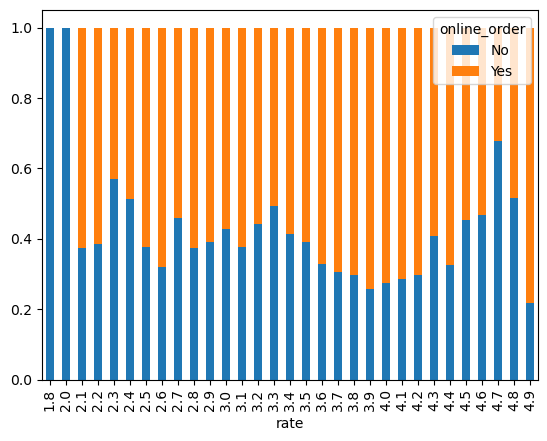

In [21]:
x.plot(kind='bar' , stacked=True)


We can observe that For good rating ie > 4 , for most instances it seems that rest who accepts online order have received more number of ratings
than those rest. who don't accept online order 

#### lets do some text analysis also

In [24]:
#exploring restuarant types

In [25]:
Zomato_data['rest_type'].isnull().sum()

227

In [26]:
Zom_clean1 = Zomato_data.dropna(subset=['rest_type'])

In [27]:
Zom_clean1['rest_type'].isnull().sum()

0

In [28]:
Zom_clean1['rest_type'].unique()

array(['Casual Dining', 'Cafe, Casual Dining', 'Quick Bites',
       'Casual Dining, Cafe', 'Cafe', 'Quick Bites, Cafe',
       'Cafe, Quick Bites', 'Delivery', 'Mess', 'Dessert Parlor',
       'Bakery, Dessert Parlor', 'Pub', 'Bakery', 'Takeaway, Delivery',
       'Fine Dining', 'Beverage Shop', 'Sweet Shop', 'Bar',
       'Beverage Shop, Quick Bites', 'Confectionery',
       'Quick Bites, Beverage Shop', 'Dessert Parlor, Sweet Shop',
       'Bakery, Quick Bites', 'Sweet Shop, Quick Bites', 'Kiosk',
       'Food Truck', 'Quick Bites, Dessert Parlor',
       'Beverage Shop, Dessert Parlor', 'Takeaway', 'Pub, Casual Dining',
       'Casual Dining, Bar', 'Dessert Parlor, Beverage Shop',
       'Quick Bites, Bakery', 'Dessert Parlor, Quick Bites',
       'Microbrewery, Casual Dining', 'Lounge', 'Bar, Casual Dining',
       'Food Court', 'Cafe, Bakery', 'Dhaba', 'Quick Bites, Sweet Shop',
       'Microbrewery', 'Food Court, Quick Bites', 'Pub, Bar',
       'Casual Dining, Pub', 'Lounge, Ba

In [29]:
#lets look into one category for now

In [30]:
### extracting data of 'Quick Bites' only ..
quick_bites_df = Zom_clean1[Zom_clean1['rest_type'].str.contains('Quick Bites')]

In [31]:
quick_bites_df.shape

(20639, 18)

In [32]:
quick_bites_df.columns

Index(['index', 'url', 'address', 'name', 'online_order', 'book_table', 'rate',
       'votes', 'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [33]:
#lets perform text analysis of Reveiws for this perticular type

In [34]:
quick_bites_df['reviews_list'].head()

3     [('Rated 4.0', "RATED\n  Great food and proper...
23    [('Rated 4.0', "RATED\n  So, went here with fr...
26    [('Rated 5.0', 'RATED\n  please provide some e...
31    [('Rated 1.0', "RATED\n  Worst restaurant ever...
34    [('Rated 3.0', 'RATED\n  Not worth for the mon...
Name: reviews_list, dtype: object

In [35]:
# Converting all the text to lowercase
quick_bites_df['reviews_list'] = quick_bites_df['reviews_list'].apply(lambda x:x.lower())

In [36]:
#### b) tokenization

In [37]:
from nltk.corpus import RegexpTokenizer

In [38]:
##  Creating a regular expression tokenizer that have only alphabets , ie remove all the special characters
# This will return separate words (tokens) from the text in the form of list

tokenizer = RegexpTokenizer("[a-zA-Z]+")

In [39]:
tokenizer

RegexpTokenizer(pattern='[a-zA-Z]+', gaps=False, discard_empty=True, flags=re.UNICODE|re.MULTILINE|re.DOTALL)

In [40]:
reviews_tokens = quick_bites_df['reviews_list'].apply(tokenizer.tokenize)

In [41]:
reviews_tokens

3        [rated, rated, n, great, food, and, proper, ka...
23       [rated, rated, n, so, went, here, with, friend...
26       [rated, rated, n, please, provide, some, extra...
31       [rated, rated, n, worst, restaurant, ever, veg...
34       [rated, rated, n, not, worth, for, the, money,...
                               ...                        
51641    [rated, rated, n, food, is, not, upto, the, ma...
51642                                                   []
51643                                                   []
51644                                                   []
51645    [rated, rated, n, i, was, randomly, looking, o...
Name: reviews_list, Length: 20639, dtype: object

In [42]:
from nltk.corpus import stopwords

#import nltk
#nltk.download('stopwords')

In [43]:
# These are common words defined by Python developers that typically don't add meaning to the text and can be removed
stop = stopwords.words('english')

In [44]:
# Adding custom words to stopwords 
stop.extend(['rated' , "n" , "nan" , "x" , "RATED" , "Rated"])

In [45]:
## remove stopwords from "reviews_tokens" Series
reviews_tokens_clean = reviews_tokens.apply(lambda each_review : [token for token in each_review if token not in stop])

In [46]:
### now this reviews_tokens_clean is a series ,but we need entire data in the form of 1-D list so that we can compute frequency of each word


In [47]:
list[reviews_tokens_clean]

list[3        [great, food, proper, karnataka, style, full, ...
23       [went, friends, tea, ambience, striking, say, ...
26       [please, provide, extra, sambal, quantity, les...
31       [worst, restaurant, ever, veg, manchurian, wor...
34       [worth, money, pay, ambience, good, enough, se...
                               ...                        
51641    [food, upto, mark, nquantity, food, little, nc...
51642                                                   []
51643                                                   []
51644                                                   []
51645    [randomly, looking, zomato, burger, show, rest...
Name: reviews_list, Length: 20639, dtype: object]

In [48]:
total_reviews_2D = list(reviews_tokens_clean) #as casting it into a list would give us a 2d list

In [49]:
total_reviews_1D = []

for review in total_reviews_2D:
    for word in review:
        total_reviews_1D.append(word)

In [50]:
len(total_reviews_1D)

6623270

#### e) Now we will be plotting
    1 Unigram analysis
    2 Bigram Analysis
    3 Trigram analysis

In [52]:
# obtain the frequency of individual words in the reviews

In [53]:
from nltk import FreqDist 

In [54]:
fd = FreqDist()

In [55]:
for word in total_reviews_1D:
    fd[word] = fd[word] + 1

In [56]:
fd.most_common(20)

[('food', 170672),
 ('good', 169085),
 ('place', 142338),
 ('chicken', 76826),
 ('taste', 70602),
 ('ordered', 55485),
 ('try', 43663),
 ('one', 43359),
 ('also', 42296),
 ('like', 41979),
 ('service', 39651),
 ('time', 38409),
 ('order', 37012),
 ('really', 36239),
 ('biryani', 35488),
 ('best', 33589),
 ('restaurant', 32669),
 ('great', 32601),
 ('quality', 30940),
 ('nice', 30744)]

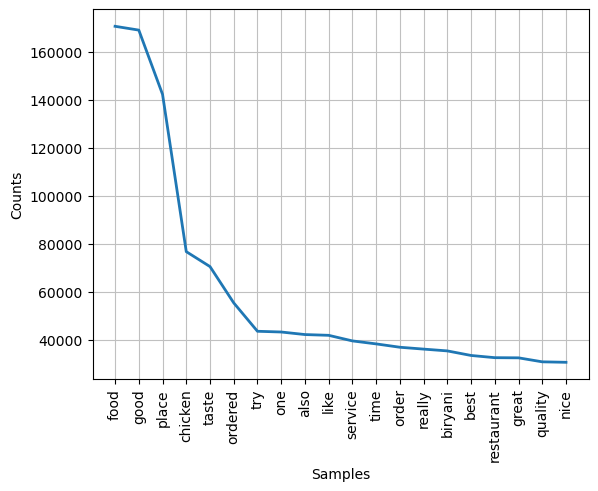

In [57]:
fd.plot(20)
plt.show()

In [58]:
## Observations
## Of the 20 most frequent words across customer reviews place, food , good , chicken ,taste ,service ,biryani

## but it is not that much clear whether food is good or not , 
## similarly what about chicken ??
## so to come up with meaningful insights , we can think of using Bi-gram analysis..

###### Bigram Analysis

In [60]:
from nltk import  bigrams , trigrams

In [61]:
# Generating bigrams from the reviews
bi_grams = bigrams(total_reviews_1D)

In [62]:
# Getting the bigram frequency distribution

fd_bigrams = FreqDist()

for bigram in bi_grams:
    fd_bigrams[bigram] = fd_bigrams[bigram] + 1

In [63]:
fd_bigrams.most_common(20)

[(('must', 'try'), 13250),
 (('good', 'food'), 11531),
 (('food', 'good'), 11134),
 (('really', 'good'), 9919),
 (('north', 'indian'), 9059),
 (('pocket', 'friendly'), 8170),
 (('taste', 'good'), 8100),
 (('good', 'place'), 8055),
 (('value', 'money'), 7139),
 (('south', 'indian'), 7032),
 (('good', 'taste'), 6593),
 (('visit', 'place'), 6296),
 (('also', 'good'), 6170),
 (('one', 'best'), 6107),
 (('fried', 'rice'), 5960),
 (('quality', 'food'), 5822),
 (('chicken', 'biryani'), 5536),
 (('xa', 'xa'), 5351),
 (('non', 'veg'), 5296),
 (('ordered', 'chicken'), 5256)]

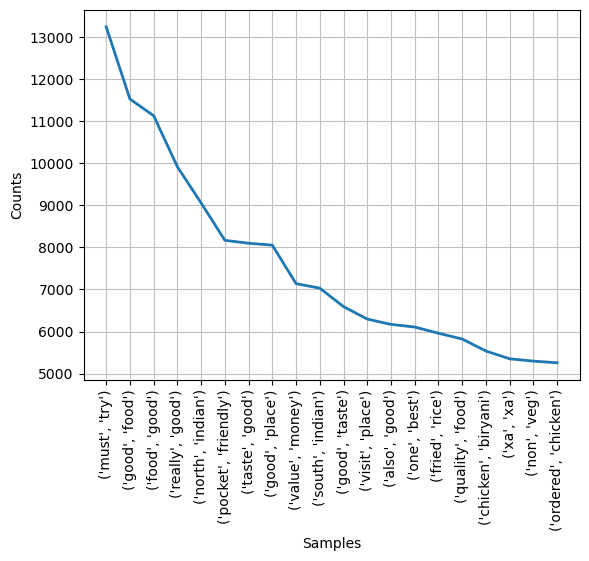

In [64]:
# Plotting the top 20 most frequent bigrams

fd_bigrams.plot(20)
plt.show()

In [65]:
fd_bigrams.most_common(100)

[(('must', 'try'), 13250),
 (('good', 'food'), 11531),
 (('food', 'good'), 11134),
 (('really', 'good'), 9919),
 (('north', 'indian'), 9059),
 (('pocket', 'friendly'), 8170),
 (('taste', 'good'), 8100),
 (('good', 'place'), 8055),
 (('value', 'money'), 7139),
 (('south', 'indian'), 7032),
 (('good', 'taste'), 6593),
 (('visit', 'place'), 6296),
 (('also', 'good'), 6170),
 (('one', 'best'), 6107),
 (('fried', 'rice'), 5960),
 (('quality', 'food'), 5822),
 (('chicken', 'biryani'), 5536),
 (('xa', 'xa'), 5351),
 (('non', 'veg'), 5296),
 (('ordered', 'chicken'), 5256),
 (('indian', 'food'), 4992),
 (('masala', 'dosa'), 4828),
 (('good', 'good'), 4755),
 (('f', 'f'), 4744),
 (('home', 'delivery'), 4721),
 (('food', 'quality'), 4407),
 (('small', 'place'), 4375),
 (('must', 'visit'), 4347),
 (('nice', 'place'), 4287),
 (('tasty', 'food'), 4051),
 (('best', 'place'), 3910),
 (('great', 'place'), 3704),
 (('good', 'service'), 3665),
 (('first', 'time'), 3558),
 (('take', 'away'), 3530),
 (('go

    Observations
    We have some new insights! Food items/preferences mentioned in the top 50 bigrams are 
    
    Fried Rice , Ice cream , non-veg , chicken biryani , main course
    Fried Rice
 

    Factors contributing to restaurant experience are : 
    good food > pocket friendly > good place > good place > value (for) money  > Home delivery..

    There's a key insight here: the expense factor, which was missed by individual word frequency counts, 
    was picked up by the bigram frequency counts.


but there is no conclusion about north Indian or south Indian bcz it can be dish or it can be regional people as well..
so lets perform trigram anlysis to come up with some more meaningful insights..

#####  Trigram Analysis


In [68]:
tri_grams = trigrams(total_reviews_1D)

In [69]:
# Generating trigrams from the reviews
fd_trigrams = FreqDist()

for trigram in tri_grams:
    fd_trigrams[trigram] = fd_trigrams[trigram] + 1

In [70]:
fd_trigrams.most_common(50)

[(('xa', 'xa', 'xa'), 5059),
 (('north', 'indian', 'food'), 3079),
 (('f', 'f', 'f'), 2581),
 (('paneer', 'butter', 'masala'), 1638),
 (('must', 'visit', 'place'), 1594),
 (('south', 'indian', 'food'), 1486),
 (('good', 'food', 'good'), 1367),
 (('ordered', 'chicken', 'biryani'), 1275),
 (('pocket', 'friendly', 'place'), 1059),
 (('chicken', 'fried', 'rice'), 1050),
 (('f', 'c', 'f'), 1042),
 (('food', 'really', 'good'), 1021),
 (('veg', 'non', 'veg'), 1013),
 (('worst', 'food', 'ever'), 939),
 (('like', 'home', 'made'), 897),
 (('must', 'try', 'place'), 896),
 (('good', 'taste', 'good'), 827),
 (('good', 'value', 'money'), 825),
 (('south', 'indian', 'breakfast'), 816),
 (('home', 'made', 'food'), 787),
 (('food', 'reasonable', 'price'), 746),
 (('good', 'quality', 'food'), 732),
 (('ghar', 'ka', 'khana'), 693),
 (('keep', 'good', 'work'), 692),
 (('taste', 'really', 'good'), 686),
 (('home', 'cooked', 'food'), 653),
 (('quality', 'food', 'good'), 649),
 (('food', 'quality', 'good'), 

## Observations
    There appears to be some bad data (strings of "f f f") somewhere in the reviews, but we'll ignore that.

    The specific food preferences we can see here are north Indian Food , paneer butter masala,
    South Indian food & chicken fried rice...
    ie , banglore has alot of people who loves chicken 

##### We have some location fields of the data lets make use of it

We can find where are most of the North-Indian restaurants situated in Bengaluru ? 
First extract latitudes & longitudes from data so that we are able to use maps..

In [138]:
Zomato_data.head(3)

,index,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari


In [140]:
Zomato_data.location.isnull().sum()

21

In [142]:
Zomato_copy = Zomato_data.dropna(subset=['location'])

In [146]:
Zomato_copy.location.isnull().sum()

0

In [148]:
#!pip install geocoder
#!pip install geopy

   ---------------------------------------- 0.0/98.6 kB ? eta -:--:--
   ---- ----------------------------------- 10.2/98.6 kB ? eta -:--:--
   ------------ --------------------------- 30.7/98.6 kB 1.3 MB/s eta 0:00:01
   ---------------------------------------- 98.6/98.6 kB 1.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/491.3 kB ? eta -:--:--
   -- ------------------------------------- 30.7/491.3 kB 1.4 MB/s eta 0:00:01
   ----- ---------------------------------- 61.4/491.3 kB 1.1 MB/s eta 0:00:01
   --------- ------------------------------ 112.6/491.3 kB 1.1 MB/s eta 0:00:01
   ------------ --------------------------- 153.6/491.3 kB 1.0 MB/s eta 0:00:01
   ------------- ------------------------ 174.1/491.3 kB 952.6 kB/s eta 0:00:01
   ------------- ------------------------ 174.1/491.3 kB 952.6 kB/s eta 0:00:01
   ------------- ------------------------ 174.1/491.3 kB 952.6 kB/s eta 0:00:01
   ------------------ ------------------- 235.5/491.3 kB 850.1 kB/s eta 0:

In [150]:
Zomato_copy['location'].head()

0    Banashankari
1    Banashankari
2    Banashankari
3    Banashankari
4    Basavanagudi
Name: location, dtype: object

In [152]:
#lets add 'Bangalore , Karnataka , India' string to each row
#so we will get accurate cordinates if similar place name exists somewhere else in india or world,
#EX; Indiranagar is a common name for a place in many cities in india

In [154]:
Zomato_copy['location'] = Zomato_copy['location'] + " , Bangalore  , Karnataka , India"

In [156]:
Zomato_copy['location']

0            Banashankari , Bangalore  , Karnataka , India
1            Banashankari , Bangalore  , Karnataka , India
2            Banashankari , Bangalore  , Karnataka , India
3            Banashankari , Bangalore  , Karnataka , India
4            Basavanagudi , Bangalore  , Karnataka , India
                               ...                        
51712          Whitefield , Bangalore  , Karnataka , India
51713          Whitefield , Bangalore  , Karnataka , India
51714          Whitefield , Bangalore  , Karnataka , India
51715    ITPL Main Road, Whitefield , Bangalore  , Karn...
51716    ITPL Main Road, Whitefield , Bangalore  , Karn...
Name: location, Length: 51696, dtype: object

In [160]:
Zomato_copy['location'].unique()

array(['Banashankari , Bangalore  , Karnataka , India',
       'Basavanagudi , Bangalore  , Karnataka , India',
       'Mysore Road , Bangalore  , Karnataka , India',
       'Jayanagar , Bangalore  , Karnataka , India',
       'Kumaraswamy Layout , Bangalore  , Karnataka , India',
       'Rajarajeshwari Nagar , Bangalore  , Karnataka , India',
       'Vijay Nagar , Bangalore  , Karnataka , India',
       'Uttarahalli , Bangalore  , Karnataka , India',
       'JP Nagar , Bangalore  , Karnataka , India',
       'South Bangalore , Bangalore  , Karnataka , India',
       'City Market , Bangalore  , Karnataka , India',
       'Nagarbhavi , Bangalore  , Karnataka , India',
       'Bannerghatta Road , Bangalore  , Karnataka , India',
       'BTM , Bangalore  , Karnataka , India',
       'Kanakapura Road , Bangalore  , Karnataka , India',
       'Bommanahalli , Bangalore  , Karnataka , India',
       'CV Raman Nagar , Bangalore  , Karnataka , India',
       'Electronic City , Bangalore  , Karn

In [162]:
locations = pd.DataFrame(Zomato_copy['location'].unique())

In [168]:
locations.columns = ['name']

In [172]:
locations.head(3)

,name
0,"Banashankari , Bangalore , Karnataka , India"
1,"Basavanagudi , Bangalore , Karnataka , India"
2,"Mysore Road , Bangalore , Karnataka , India"


In [174]:
from geopy.geocoders import Nominatim

In [176]:
### assign timeout=None in order to get rid of timeout error..
geolocator = Nominatim(user_agent="app" , timeout=None)


In [178]:
lat=[]
lon=[]

for location in locations['name']:
    location = geolocator.geocode(location)
    if location is None:
        lat.append(np.nan)
        lon.append(np.nan)
    else:
        lat.append(location.latitude)
        lon.append(location.longitude)
    

In [180]:
locations['latitude'] = lat
locations['longitude'] = lon

In [182]:
locations.head()

,name,latitude,longitude
0,"Banashankari , Bangalore , Karnataka , India",12.939333,77.553982
1,"Basavanagudi , Bangalore , Karnataka , India",12.941726,77.575502
2,"Mysore Road , Bangalore , Karnataka , India",12.951897,77.540282
3,"Jayanagar , Bangalore , Karnataka , India",12.939904,77.582638
4,"Kumaraswamy Layout , Bangalore , Karnataka , ...",12.906768,77.559502


now that we have the coordinates we can use them to plot locations on the map

In [185]:
locations.isnull().sum()

name         0
latitude     2
longitude    2
dtype: int64

we have 2 null values as the geocoder wasn't able to find coordinates for that location, we can either manually update as it is only 2 values, or we can drop them, i will manually update those by a Google search

In [197]:
locations[locations['latitude'].isna()]

,name,latitude,longitude
79,"Rammurthy Nagar , Bangalore , Karnataka , India",NaN,NaN
85,"Sadashiv Nagar , Bangalore , Karnataka , India",NaN,NaN


In [199]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [201]:
locations['latitude'][79] = 13.0163
locations['longitude'][79] = 77.6785

In [204]:
locations['latitude'][85] = 13.0068
locations['longitude'][85] = 77.5813

In [206]:
locations.isnull().sum()

name         0
latitude     0
longitude    0
dtype: int64

In [208]:
#We can plot what type of food is popular in what area, example what locations in bangelore eat most chinese food or maybe some other cuisne 

In [210]:
Zomato_copy['cuisines'].isnull().sum()

24

In [212]:
Zomato_copy = Zomato_copy.dropna(subset=['cuisines'])

In [216]:
Zomato_copy['cuisines'].isnull().sum()

0

In [218]:
# importing libraries to plot maps

In [222]:
# !pip install folium  #uncomment to install

   ---------------------------------------- 0.0/110.5 kB ? eta -:--:--
   --- ------------------------------------ 10.2/110.5 kB ? eta -:--:--
   ---------- ---------------------------- 30.7/110.5 kB 325.1 kB/s eta 0:00:01
   ---------- ---------------------------- 30.7/110.5 kB 325.1 kB/s eta 0:00:01
   ------------------ -------------------- 51.2/110.5 kB 375.8 kB/s eta 0:00:01
   --------------------- ----------------- 61.4/110.5 kB 297.7 kB/s eta 0:00:01
   --------------------- ----------------- 61.4/110.5 kB 297.7 kB/s eta 0:00:01
   ---------------------------- ---------- 81.9/110.5 kB 327.3 kB/s eta 0:00:01
   ---------------------------- ---------- 81.9/110.5 kB 327.3 kB/s eta 0:00:01
   ---------------------------- ---------- 81.9/110.5 kB 327.3 kB/s eta 0:00:01
   -------------------------------------- 110.5/110.5 kB 291.5 kB/s eta 0:00:00


In [224]:
import folium

In [226]:
basemap = folium.Map()

In [228]:
basemap

In [230]:
#We want to Create a heatmap on the map for a cuisine popularity in the city

In [232]:
from folium.plugins import HeatMap

In [264]:
def get_heatmap(cuisine):
    cuisine_df = Zomato_copy[Zomato_copy['cuisines'].str.contains(cuisine)]
    
    cuisine_rest_count = cuisine_df['location'].value_counts().reset_index()
    cuisine_rest_count.columns = ['name', 'count']
    heatmap_df = cuisine_rest_count.merge(locations , on='name' , how='left')
    print(heatmap_df.head(4))
    
    basemap = folium.Map()
    HeatMap(heatmap_df[['latitude', 'longitude' , "count"]]).add_to(basemap)
    return basemap


In [258]:
print(Zomato_copy['cuisines'].unique())

['North Indian, Mughlai, Chinese' 'Chinese, North Indian, Thai'
 'Cafe, Mexican, Italian' ... 'North Indian, Street Food, Biryani'
 'Chinese, Mughlai' 'North Indian, Chinese, Arabian, Momos']


In [266]:
get_heatmap('North Indian')

                                            name  count   latitude  longitude
0           BTM , Bangalore  , Karnataka , India   2469  12.916360  77.604733
1           HSR , Bangalore  , Karnataka , India   1123  12.900563  77.649475
2    Whitefield , Bangalore  , Karnataka , India   1059  12.969637  77.749745
3  Marathahalli , Bangalore  , Karnataka , India   1038  12.955257  77.698416


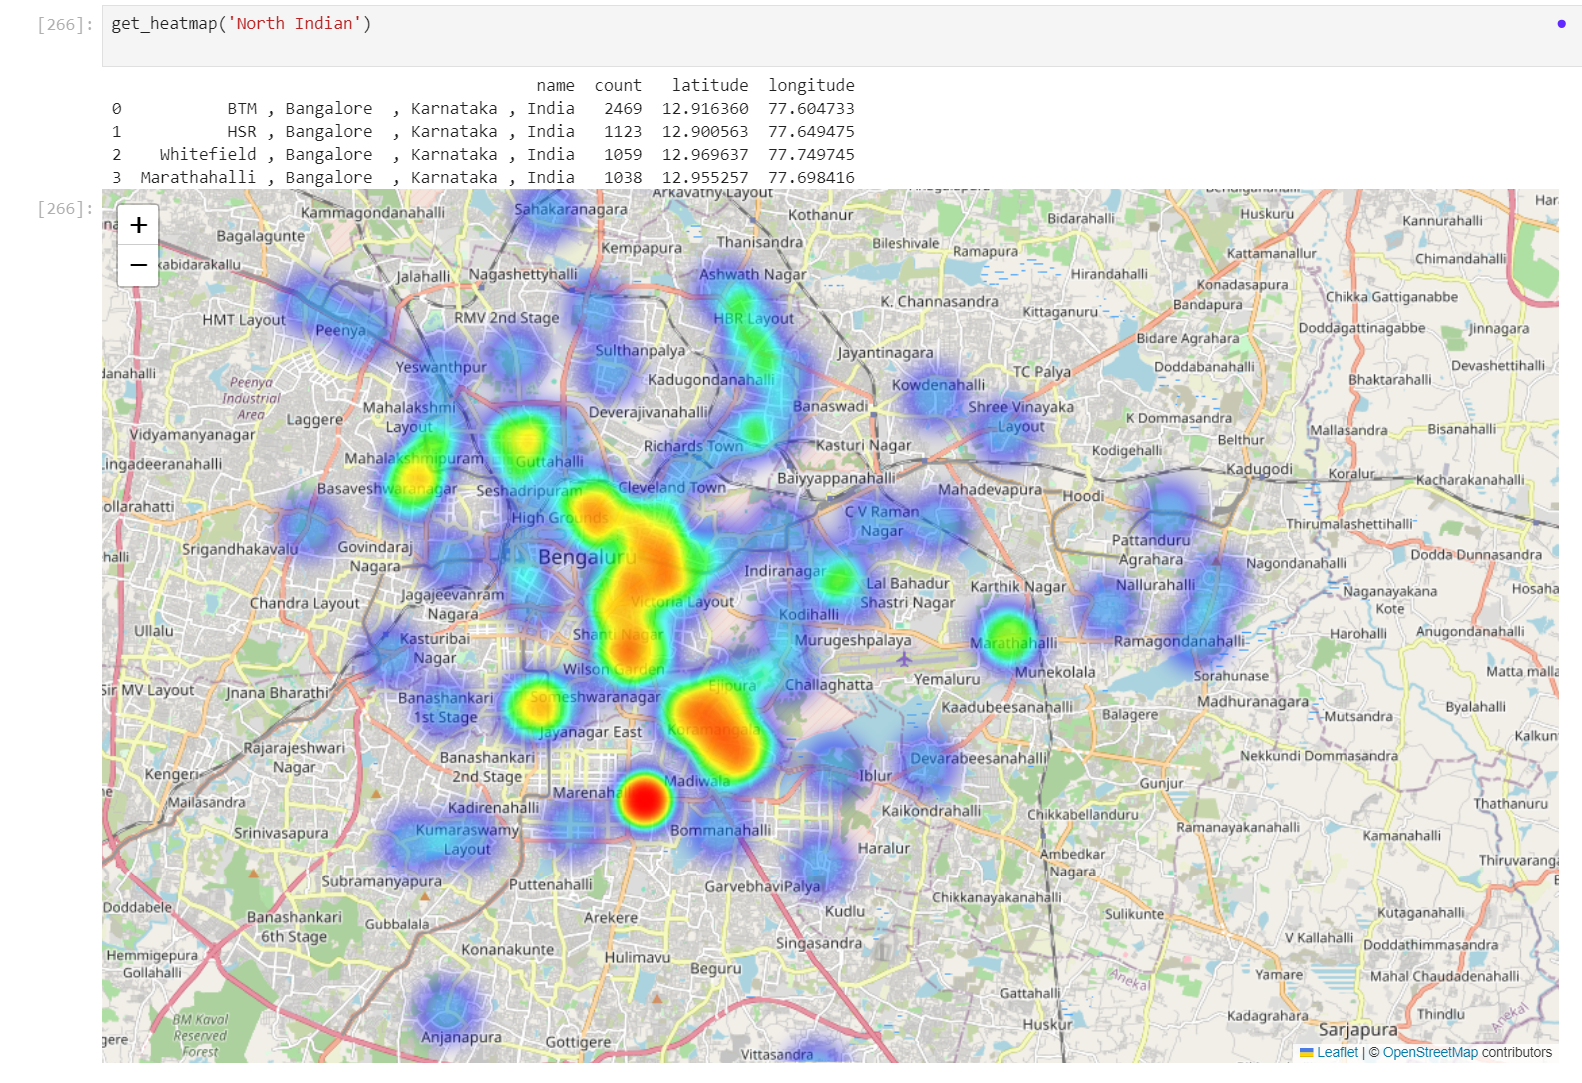

We can Observe that despite banglore being a south indian city North indian Cuisine is quite popular in centeral banglore

In [272]:
get_heatmap('Momos')

                                                name  count   latitude  \
0  Koramangala 5th Block , Bangalore  , Karnataka...    169  12.934843   
1               BTM , Bangalore  , Karnataka , India    105  12.916360   
2       Indiranagar , Bangalore  , Karnataka , India     68  12.996298   
3      Brigade Road , Bangalore  , Karnataka , India     55  12.973644   

   longitude  
0  77.618977  
1  77.604733  
2  77.545278  
3  77.607508  


Momo's are most popular in the area Kormangla there is an intense Hotspot created in that area for Momo's

### conclusions(Inferences)
    - It is clear that restaurants tend to concentrate in central bangalore area.
    - The clutter of restaurants lowers are we move away from central.
    - So,potential restaurant entrepreneurs can refer this and find out good locations for their venture.